## Import Libraries and Tools

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

### Modeling Data

In [4]:
df_values = pd.read_csv('Data/train_values.csv')
df_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_labels = pd.read_csv('Data/train_labels.csv')
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
df = df_values.merge(df_labels, on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [11]:
list(df.columns)

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_of

In [7]:
df.corr()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,...,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,...,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,...,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,...,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,...,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,...,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628,0.291325


### Categorical Column Value Names Data

In [52]:
df_building_structure = pd.read_csv('Data/csv_building_structure.csv')
df_building_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [53]:
df_building_ownership_and_use = pd.read_csv('Data/csv_building_ownership_and_use.csv')
df_building_ownership_and_use.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [57]:
building_structure_list = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                           'other_floor_type', 'position', 'plan_configuration']

building_ownership_and_use_list = ['legal_ownership_status']

In [73]:
for name in building_structure_list:
    print('-----------------')
    print(name)
    print(df_building_structure[name].value_counts().index)
    print(df[name].value_counts().index)

    
for name in building_ownership_and_use_list:
    print('-----------------')
    print(name)
    print(df_building_ownership_and_use[name].value_counts().index)
    print(df[name].value_counts().index)

-----------------
land_surface_condition
Index(['Flat', 'Moderate slope', 'Steep slope'], dtype='object')
Index(['t', 'n', 'o'], dtype='object')
-----------------
foundation_type
Index(['Mud mortar-Stone/Brick', 'Bamboo/Timber', 'Cement-Stone/Brick', 'RC',
       'Other'],
      dtype='object')
Index(['r', 'w', 'u', 'i', 'h'], dtype='object')
-----------------
roof_type
Index(['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof', 'RCC/RB/RBC'], dtype='object')
Index(['n', 'q', 'x'], dtype='object')
-----------------
ground_floor_type
Index(['Mud', 'RC', 'Brick/Stone', 'Timber', 'Other'], dtype='object')
Index(['f', 'x', 'v', 'z', 'm'], dtype='object')
-----------------
other_floor_type
Index(['TImber/Bamboo-Mud', 'Timber-Planck', 'Not applicable', 'RCC/RB/RBC'], dtype='object')
Index(['q', 'x', 'j', 's'], dtype='object')
-----------------
position
Index(['Not attached', 'Attached-1 side', 'Attached-2 side',
       'Attached-3 side'],
      dtype='object')
Index(['s', 't', 'j', 'o'], 

In [90]:
df['building_id'].sort_values()

47748           4
212102          8
60133          12
34181          16
25045          17
           ...   
73193     1052921
79815     1052926
79795     1052929
241578    1052931
43383     1052934
Name: building_id, Length: 260601, dtype: int64

In [91]:
df_building_structure['building_id'].sort_values()

0         120101000011
1         120101000021
2         120101000031
3         120101000041
4         120101000051
              ...     
762101    366709001241
762102    366709001251
762103    366709001261
762104    366709001271
762105    366709001281
Name: building_id, Length: 762106, dtype: int64

### Class Counts

Lets take a look at are target classes and see what kind of counts we have.

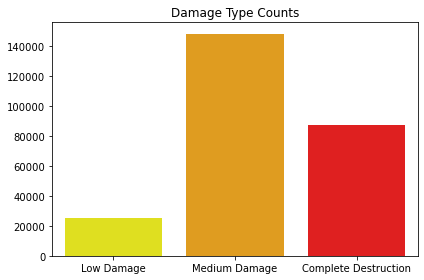

In [8]:
fig, ax = plt.subplots()

x = df['damage_grade'].value_counts().index
y = df['damage_grade'].value_counts().values

labels = ['Low Damage', 'Medium Damage', 'Complete Destruction']
color = ['yellow','orange', 'red']

ax = sns.barplot(x=x, y=y, palette=color)
ax.set_xticklabels(labels)
ax.set_title('Damage Type Counts')

plt.tight_layout()
fig.savefig('Images/classes.png')

Looks like are classes are imbalance this may cuase an issues down the road when we start training are models.

### Land Surface Condition Counts

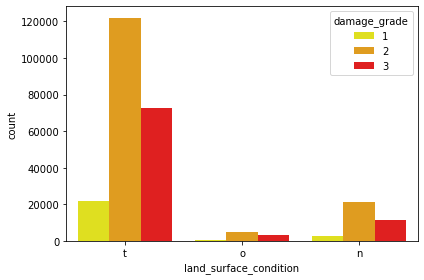

In [92]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='land_surface_condition', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Foundation Type

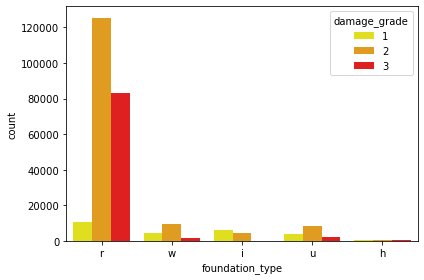

In [104]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='foundation_type', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Roof Type

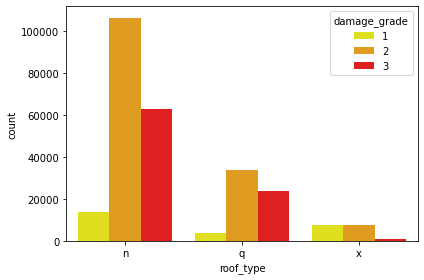

In [105]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='roof_type', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Ground Floor Type

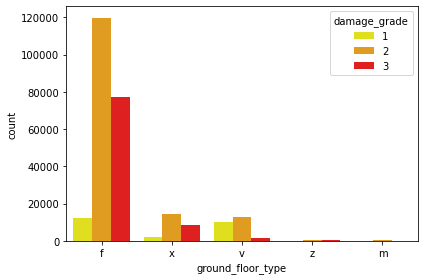

In [106]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='ground_floor_type', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Other Floor Type

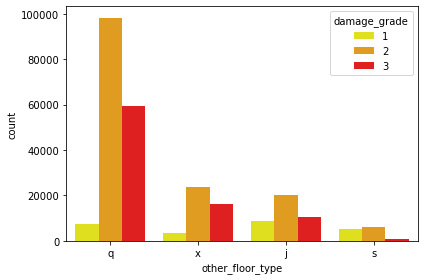

In [107]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='other_floor_type', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Position

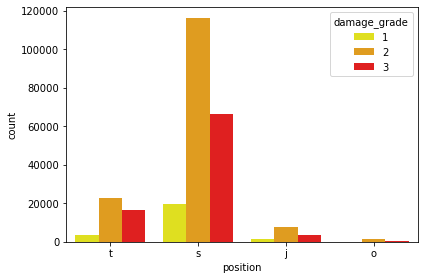

In [108]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='position', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Plan Configuration

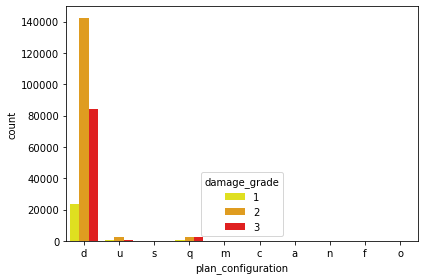

In [109]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='plan_configuration', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

### Legal Ownership Status

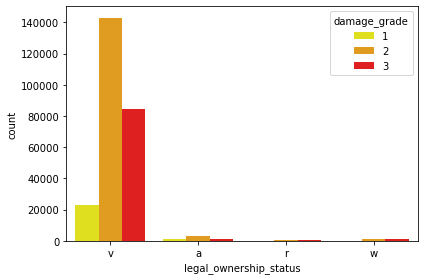

In [113]:
fig, ax = plt.subplots()

color = ['yellow','orange', 'red']
ax = sns.countplot(x='legal_ownership_status', hue='damage_grade', palette=color, data=df)

plt.tight_layout()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

## First Simple Model (FSM)

For the FSM we will use just the numerical columns and are classifier we will use a Decision Tree Classifer. First things first, we need to split that train by doing a train test split.

In [11]:
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 
         'legal_ownership_status', 'damage_grade'], axis=1)
y_fsm = df['damage_grade']

X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [12]:
fsm_dt = DecisionTreeClassifier(random_state=42, )
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

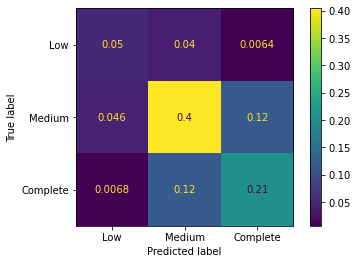

In [13]:
plot_confusion_matrix(fsm_dt, X_test_fsm, y_test_fsm, normalize='all', 
                      display_labels=['Low', 'Medium', 'Complete']);

In [14]:
y_hat_fsm = fsm_dt.predict(X_test_fsm)

In [15]:
print('  First Simple Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test_fsm, y_hat_fsm))
print('   Recall:', recall_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('Precision:', precision_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('       F1:', f1_score(y_test_fsm, y_hat_fsm, average = 'macro'))

  First Simple Model Scores
-----------------------------
 Accuracy: 0.6604503384445365
   Recall: 0.6149900294776912
Precision: 0.6073121797582424
       F1: 0.6109604665814518
